In [1]:
import matplotlib.pyplot as plt
import numpy as np
import dill 
from sfiabp.base import base2ptrigo 
from sfiabp.vectorial.analytics import sfiprod1d
from scipy.special import factorial

# warning problem with math.factorial with large number (>21)
# dtype = object error
# from math import factorial

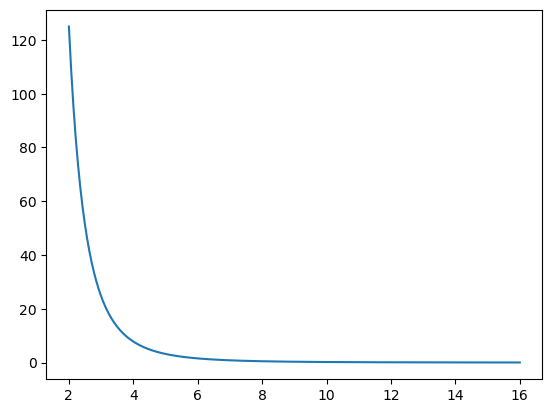

In [2]:
#### 1d function to infer ####

def JanusFunc(x):
    y = 2000/(x**4)
    return y
 
lfun = JanusFunc

xtest = np.linspace(2,16,200)
plt.figure()
plt.plot(xtest,lfun(xtest))

number of basis function :  7


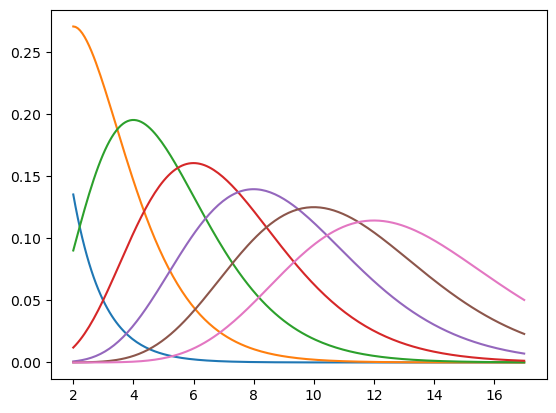

In [3]:
#### 1d basis function ####

def Poly(n) :
    xf = lambda x : (x)**n
    return xf

def Gauss(b,v) :
    xf = lambda x : np.exp(-0.5*((x-b)/v)**2)
    return xf

def Step(c,w):
    xf = lambda x : 1*(x>=(c-w))*(x<(c+w))
    return xf

def PolyExp(k,r0) :
    return lambda x: (x/r0)**k*np.exp(-x/r0)/factorial(k)

def Inv(k) :
    return lambda x: 1/x**k


# VectorRad = ( 0.1, np.arange(0,16,0.5) ) 
# Wid = VectorRad[0]
# Center = VectorRad[1]
# VectorK = Center / Wid 
# Base = [ base2ptrigo.PolyExpBig(k,Wid) for k in VectorK.astype(int) ]
# Base = [ Gauss(b,1) for b in [4.5,5.5,6.5,7.5] ]
# Base = [ Poly(n) for n in [-2,-1,0] ]
# Base = [ PolyExpShift(k,1,5) for k in np.arange(0,13,1) ]
Base = [ PolyExp(k,1) for k in [0,2,4,6,8,10,12] ]
# Base = [ PolyExp(k,0.1) for k in np.array([30,35,40,45,50,55,60]) ]
# Base = [ PolyExp(k,1) for k in np.array([3,4,5,6,7]) ]
# Base = [ PolyExp(k,0.5) for k in np.array([ 6, 7, 8, 9, 10, 11, 12, 13]) ]
# Base = [ PolyExp(n,1) for n in np.arange(0,12,2) ]
# Base = [ Inv(k) for k in [0,1,2,3,4,5,6] ]

xtest = np.linspace(2,17,200)
plt.figure()
for i in range(len(Base)):
    plt.plot(xtest,Base[i](xtest))

print('number of basis function : ', len(Base))

In [4]:
#### compute the inverse with sfiprod1d #### 

# absice vector 
# xsamp = np.linspace(1,16,1600)
xsamp = np.linspace(3,16,2000)
# x2 = np.linspace(15,16,5)
# xsamp = np.concatenate((x1,x2,x2,x2,x2,x2)) 
ResFunc, vcof = sfiprod1d(lfun,Base,xsamp)


Text(0.5, 1.0, 'weighted  basis functions')

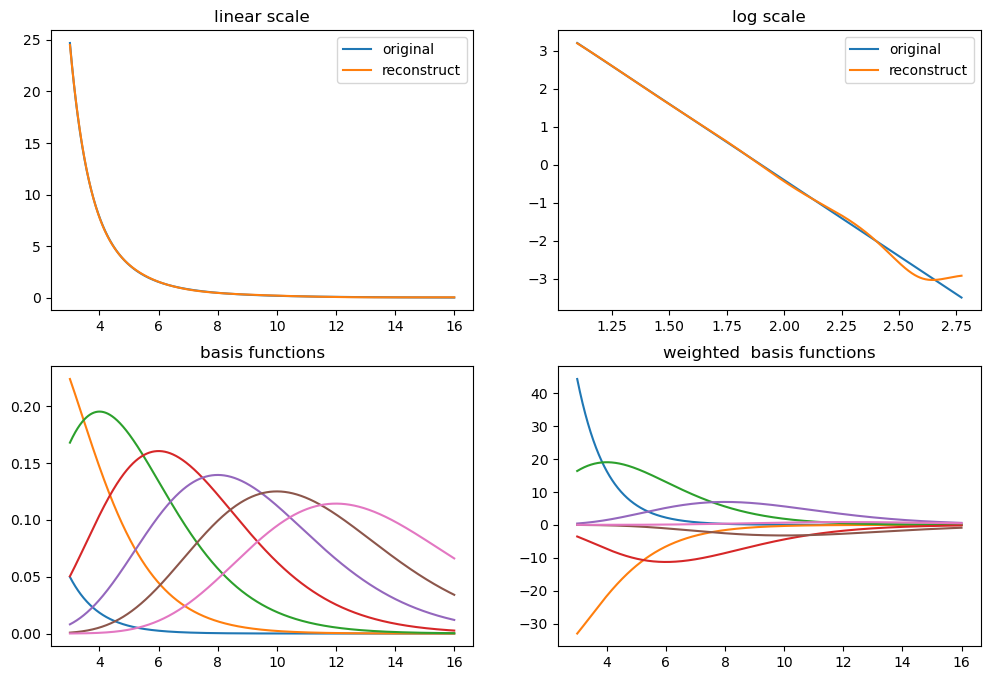

In [5]:
#### plot functions #### 

xtest = np.linspace(min(xsamp),max(xsamp),1000)  

fig, ax = plt.subplots(2,2,figsize=(12,8))

ax[0,0].set_title('linear scale')
ax[0,0].plot(xtest,lfun(xtest),label='original')
ax[0,0].plot(xtest,ResFunc(xtest),label='reconstruct')
ax[0,0].legend()

ax[0,1].set_title('log scale')
ax[0,1].plot(np.log(xtest),np.log(lfun(xtest)),label='original')
ax[0,1].plot(np.log(xtest),np.log(ResFunc(xtest)),label='reconstruct')
ax[0,1].legend()

nb = len(Base)
for i in range(nb):
    ax[1,0].plot(xtest,Base[i](xtest))
ax[1,0].set_title('basis functions')

for i in range(nb):
    ax[1,1].plot(xtest,vcof[i]*Base[i](xtest))
ax[1,1].set_title('weighted  basis functions')
